In [1]:
!wget https://archive.ics.uci.edu/static/public/53/iris.zip
!unzip iris.zip

--2023-11-27 06:40:28--  https://archive.ics.uci.edu/static/public/53/iris.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘iris.zip’

iris.zip                [ <=>                ]   3.65K  --.-KB/s    in 0s      

2023-11-27 06:40:28 (695 MB/s) - ‘iris.zip’ saved [3738]

Archive:  iris.zip
  inflating: Index                   
  inflating: bezdekIris.data         
  inflating: iris.data               
  inflating: iris.names              


In [3]:
import numpy as np
X = []
y = []
for line in open("iris.data", "r"):
  line = line.strip()
  if line != "":
    tokens = line.split(",")
    X.append([float(t) for t in tokens[:4]])
    y.append(tokens[4])
y_labels = list(set(y))
y = [y_labels.index(a) for a in y]
X = np.array(X)
y = np.array(y)

In [5]:
X,y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

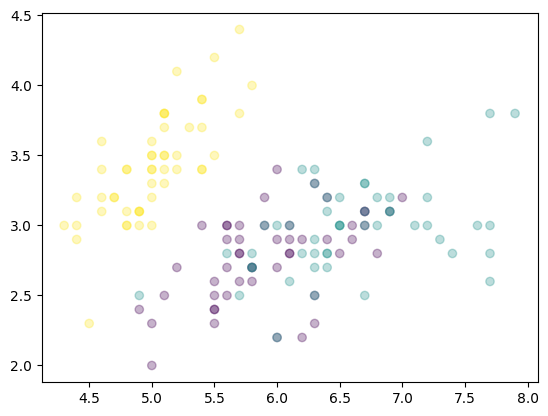

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.3)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
print("train accuracy:", accuracy_score(y_train_pred, y_train))
print("test accuracy:", accuracy_score(y_test_pred, y_test))

train accuracy: 0.9833333333333333
test accuracy: 0.9666666666666667


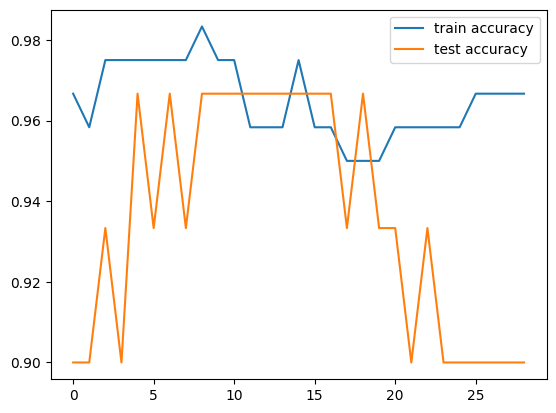

In [9]:
# k값 찾기
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
scores = []
test_scores = []
for k in range(1,30):
  knn = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(knn, X_train, y_train, cv=10, scoring="accuracy")
  scores.append(score.mean())
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  test_scores.append(accuracy_score(y_test, y_pred))
plt.plot(scores, label="train accuracy")
plt.plot(test_scores, label="test accuracy")
plt.legend()
plt.show()